In [1]:
#Face Recognition:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
faces = fetch_lfw_people(min_faces_per_person=60, resize=0.4)
print(faces.target_names)
print(faces.images.shape)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 50, 37)


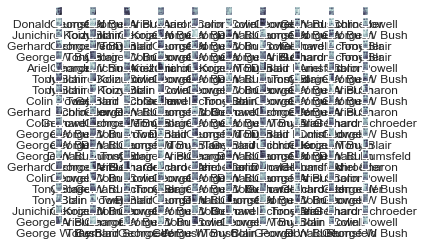

In [2]:
fig, ax = plt.subplots(20,10)
for i, axi in enumerate(ax.flat): # Enumerate -> Counter inbuilt ->enumerate(iterable, start=0)
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Xtrain/= 255.0
Xtest/= 255.0
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

model = grid.best_estimator_
yfit = model.predict(Xtest)

{'svc__C': 50, 'svc__gamma': 0.005}


In [4]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.78      0.85      0.81        66
  Donald Rumsfeld       0.95      0.60      0.73        30
    George W Bush       0.82      0.96      0.88       139
Gerhard Schroeder       1.00      0.79      0.88        24
Junichiro Koizumi       1.00      0.71      0.83        17
       Tony Blair       0.96      0.77      0.86        31

         accuracy                           0.84       320
        macro avg       0.90      0.75      0.81       320
     weighted avg       0.86      0.84      0.84       320



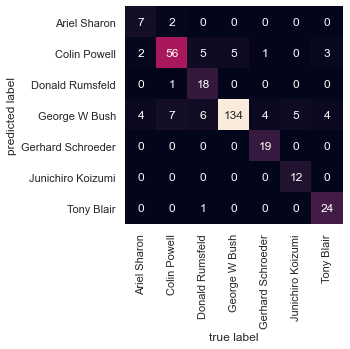

In [5]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');